In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import os
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, r2_score
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.utils import shuffle

In [92]:
params = {'legend.fontsize': 14,
         'axes.labelsize': 16,
         'axes.titlesize': 16,
         'xtick.labelsize': 10,
         'ytick.labelsize': 10}
plt.rcParams.update(params)

In [3]:
params = {}

In [7]:
os.chdir(r'/Users/samueleckford/Python/Covid_19/covid_19_analysis/datasets')

In [76]:
train_X = pd.read_csv("./data/train/train_x.csv", index_col=0).drop(columns=['dateRep']).sample(frac=1, random_state=1)
train_y = pd.read_csv("./data/train/train_y.csv", index_col=0).drop(columns=['dateRep']).sample(frac=1, random_state=1)

test_x = pd.read_csv("./data/test/test_x.csv", index_col=0).drop(columns=['dateRep']).sample(frac=1, random_state=1)
test_y = pd.read_csv("./data/test/test_y.csv", index_col=0).drop(columns=['dateRep']).sample(frac=1, random_state=1)

In [77]:
sc_x = StandardScaler()
sc_y = StandardScaler()

X_train = sc_x.fit_transform(train_X)
X_test = sc_x.transform(test_x)

y_train = sc_y.fit_transform(train_y)
y_test = sc_y.transform(test_y)

In [78]:
input_neuron = len(test_x.columns)
input_neuron

22

In [79]:
classifier = Sequential()
classifier.add(Dense(output_dim = 18, init = 'uniform', activation = 'relu', input_dim = input_neuron))
classifier.add(Dense(output_dim = 6, init = 'uniform', activation = 'relu'))
classifier.add(Dense(output_dim = 6, init = 'uniform', activation = 'relu'))
classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'linear'))

classifier.compile(optimizer = 'SGD', loss = 'mean_squared_error', metrics = ["mae"])

classifier.fit(X_train, y_train, batch_size = 30, nb_epoch = 1000, validation_split= 0.2)


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=22, units=18, kernel_initializer="uniform")`
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="linear", units=1, kernel_initializer="uniform")`
  """
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: The

Train on 1651 samples, validate on 413 samples
Epoch 1/1000
1651/1651 [==============================] - 0s 234us/step - loss: 1.0624 - mae: 0.4450 - val_loss: 0.7532 - val_mae: 0.4289
Epoch 2/1000
1651/1651 [==============================] - 0s 35us/step - loss: 1.0625 - mae: 0.4389 - val_loss: 0.7529 - val_mae: 0.4546
Epoch 3/1000
1651/1651 [==============================] - 0s 34us/step - loss: 1.0628 - mae: 0.4581 - val_loss: 0.7528 - val_mae: 0.4346
Epoch 4/1000
1651/1651 [==============================] - 0s 33us/step - loss: 1.0625 - mae: 0.4441 - val_loss: 0.7532 - val_mae: 0.4290
Epoch 5/1000
1651/1651 [==============================] - 0s 34us/step - loss: 1.0625 - mae: 0.4339 - val_loss: 0.7529 - val_mae: 0.4332
Epoch 6/1000
1651/1651 [==============================] - 0s 33us/step - loss: 1.0626 - mae: 0.4425 - val_loss: 0.7531 - val_mae: 0.4298
Epoch 7/1000
1651/1651 [==============================] - 0s 34us/step - loss: 1.0624 - mae: 0.4377 - val_loss: 0.7531 - val_mae: 

In [80]:
# Check if the relevant folders exist and create them if not
if os.path.exists("./model") is False:
    os.mkdir("./model")
# Export the model for future use to that you don't need to spend time training the model again
pickle.dump(classifier, open("./model/ReinNN.pkl", "wb"))
# Import the exported model in future runs using the greyed out line below (remove the hastag)
# model = pickle.load(open("/Users/samueleckford/Python/Covid_19/covid_19_analysis/datasets/model/ReinNN.pkl", "rb"))

In [105]:
# Calculate the predicted deaths according to the neural net model
test_x["deaths_pred"] = sc_y.inverse_transform(classifier.predict(X_test))
#df1 = pd.concat([test_x, train_X], axis=1)
df= train_X.merge(train_y,left_index=True, right_index=True)
# We merge the test dataframes together
df1 = test_x.merge(test_y, left_index=True, right_index=True)
# We append the test data to the train data
df = df.append(df1)

In [93]:
print(f"DL MAE score: {np.round(mean_absolute_error(df1.deaths, df1.deaths_pred))}")
print(f"DL R2 score: {np.round(r2_score(df1.deaths, df1.deaths_pred), 4)}")

DL MAE score: 146.0
DL R2 score: 0.601


In [95]:
# Again read in the 'covid19_df' as df_global
df_global = pd.read_csv(r"./Data_Export/covid19_df.csv", index_col=0)
# Merge in the 'deaths_pred' prediction column to compare to the real data
df_global = df_global.merge(df["deaths_pred"], left_index=True, right_index=True, how='left')

In [96]:
# Compute the prediction error
df_global['deaths_pred_error'] = df_global['deaths'] - df_global['deaths_pred']
# Compute the cumulative error for each country individually
df_global['cumulative_error'] = df_global.groupby('countriesAndTerritories')['deaths_pred_error'].cumsum()

In [97]:
# Recreate the 'top_count' list to create the graphs below
top_count = list(df_global.groupby('countriesAndTerritories')['deaths'].sum().sort_values(ascending=False).iloc[:20].keys())

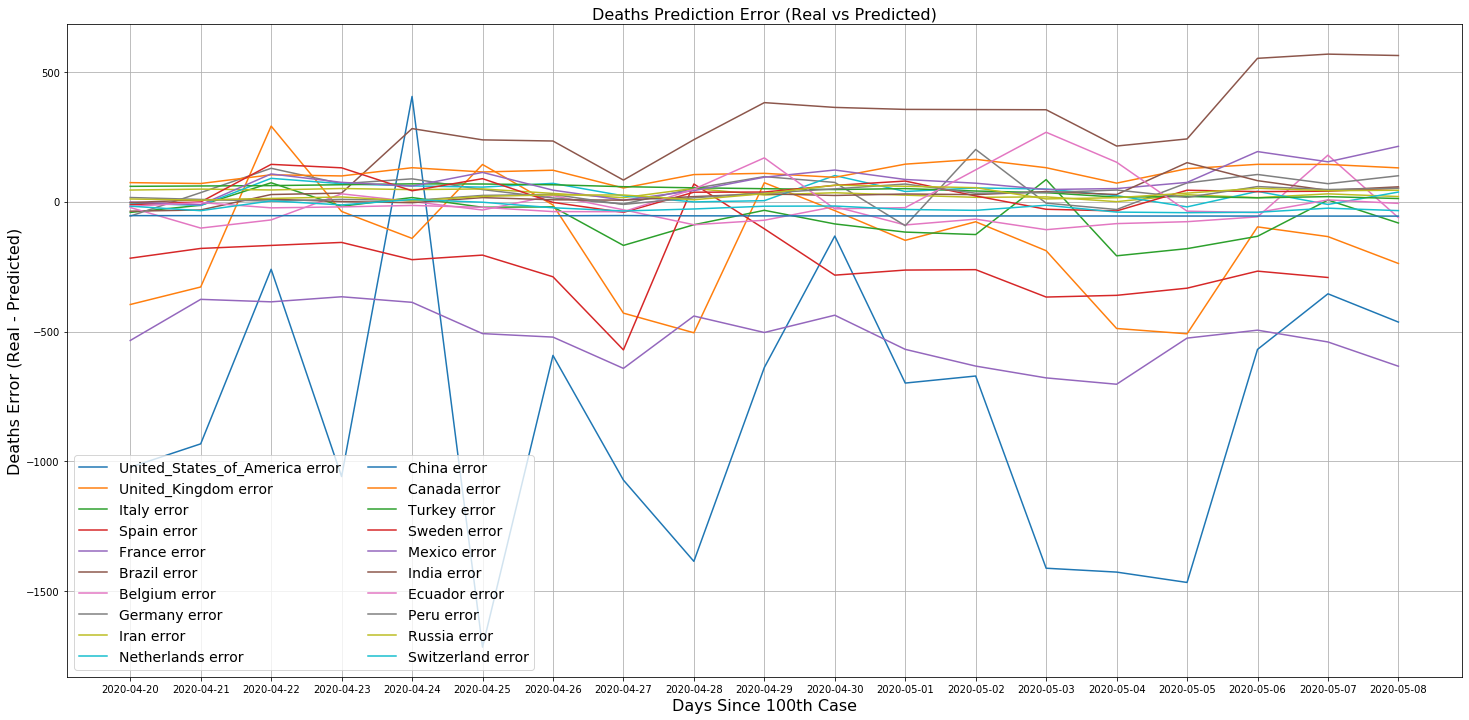

In [100]:
# Visualising the Linear Regression results
plt.figure(figsize=(25, 12))
for country in top_count:
    plt.plot(df_global[df_global["countriesAndTerritories"] == country]["dateRep"],
             df_global[df_global["countriesAndTerritories"] == country]['deaths_pred_error'], label=f"{country} error")
plt.title('Deaths Prediction Error (Real vs Predicted)')
plt.xlabel('Days Since 100th Case')
plt.ylabel('Deaths Error (Real - Predicted)')
plt.grid()
plt.legend(ncol=2, loc=3)

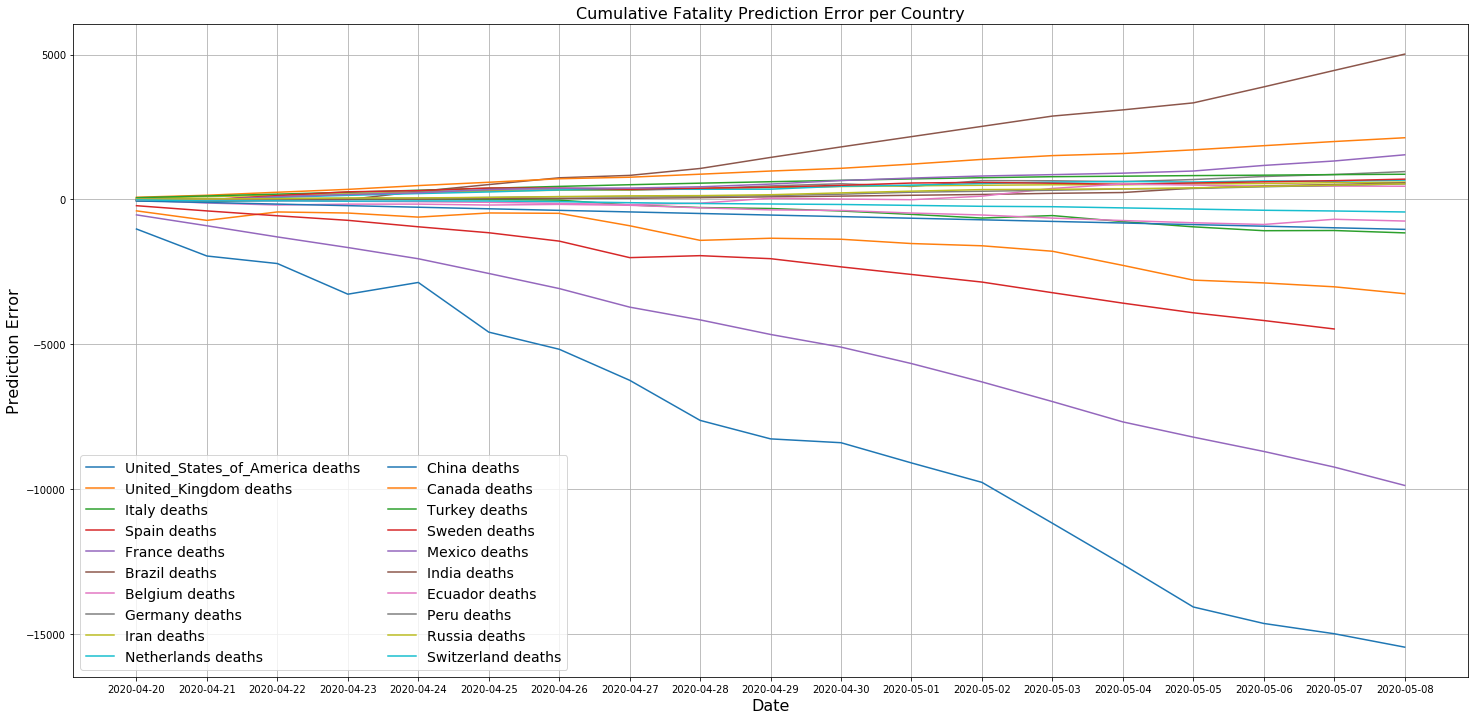

In [104]:
# Visualising the Linear Regression results
plt.figure(figsize=(25, 12))
for country in top_count:
    plt.plot(df_global[df_global["countriesAndTerritories"] == country]["dateRep"],
             df_global[df_global["countriesAndTerritories"] == country]['cumulative_error'], label=f"{country} deaths")
plt.title('Cumulative Fatality Prediction Error per Country')
plt.xlabel('Date')
plt.ylabel('Prediction Error')
plt.grid()
plt.legend(ncol=2)
plt.savefig('cumulative_error_20_nn_countries_dpi600.jpeg', dpi=600)

In [106]:
if os.path.exists("model_predictions") is False:
    os.mkdir("./model_predictions")
df_global.to_csv("./model_predictions/Rein_nn_predictions.csv")

In [35]:
#plt.style.use("ggplot")

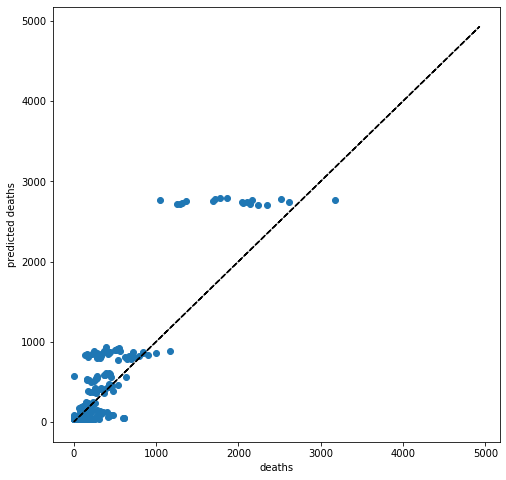

In [91]:
plt.figure(figsize=(8, 8))
plt.scatter(df.deaths, df.deaths_pred)
plt.plot(df.deaths, df.deaths, color="black", linestyle="--")
plt.xlabel("deaths")
plt.ylabel("predicted deaths")
plt.show()

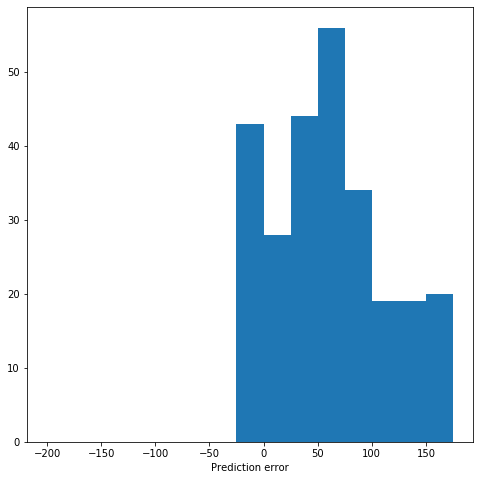

In [37]:
#plt.style.use('ggplot')
plt.figure(figsize=(8, 8))
plt.hist(df["model_error"], bins=np.arange(-200, 200,25))
plt.xlabel("Prediction error")
plt.show()